In [804]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [805]:
df = pd.read_csv('Loan Eligibility_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [806]:
df_test = pd.read_csv('Loan Eligibility_Test.csv')
df_test.drop(columns=['Loan_ID'], inplace=True)

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [808]:
df.shape

(614, 13)

## EDA

In [809]:
# different types of features
categorical_features = [feature for feature in df.drop(columns=['Loan_ID', 'Loan_Status']).columns \
                        if df[feature].dtype == 'O']
discrete_features = [feature for feature in df.drop(columns=['Loan_ID', 'Loan_Status']).columns \
                         if df[feature].dtype != 'O' and df[feature].nunique() < 20]
continuous_features = [feature for feature in df.drop(columns=['Loan_ID', 'Loan_Status']).columns \
                           if df[feature].dtype != 'O' and df[feature].nunique() >= 20]
print('Categorical Features: {}'.format(categorical_features))
print('Discrete Features: {}'.format(discrete_features))
print('Continuous Features: {}'.format(continuous_features))

Categorical Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Discrete Features: ['Loan_Amount_Term', 'Credit_History']
Continuous Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Univariate Analysis

#### Categorical Features

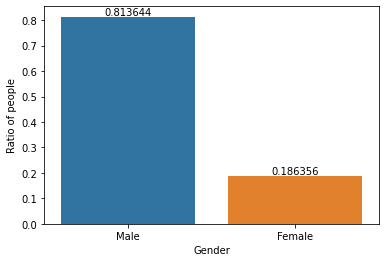

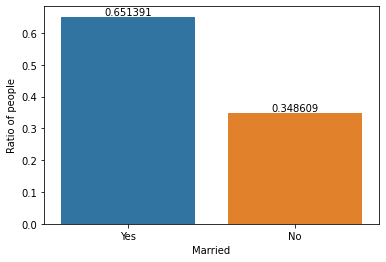

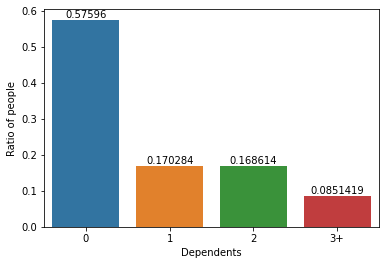

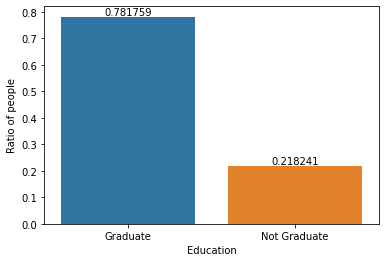

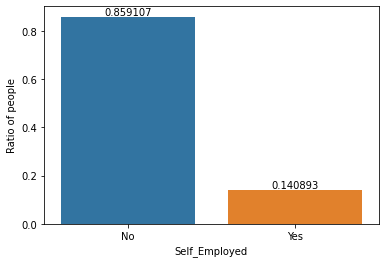

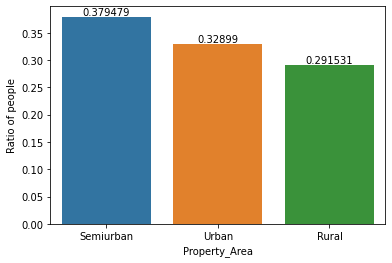

In [810]:
# distribution of different categorical features
for feature in categorical_features:
    ax = sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts(normalize=True))
    ax.bar_label(ax.containers[0])
    ax.set(xlabel=feature, ylabel='Ratio of people')
    plt.show()

* More than 80% of the applicants in the dataset are Male.
* Around 65% of the applicants are Married.
* Number of dependents is 0 for more than 50% of the applicants.
* More that three-fourth of the people in the sample are graduate.
* Very few of the applicants are self-employed (around 15%).
* Semi-urban area houses the highest number of applicants, closely followed by Urban and Rural areas.

#### Discrete Features

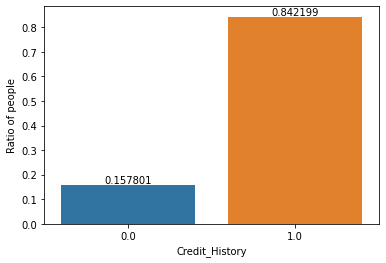

In [811]:
# distribution of discrete feature
for feature in discrete_features:
    if feature == 'Credit_History':
        ax = sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts(normalize=True))
        ax.bar_label(ax.containers[0])
        ax.set(xlabel=feature, ylabel='Ratio of people')
        plt.show()

* Most of the people (around 85%) have previously taken loans.

#### Continuous features

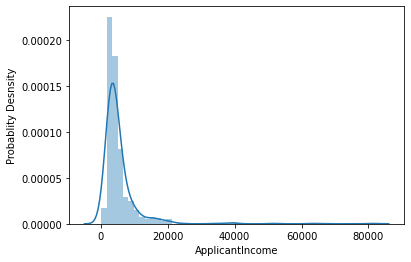

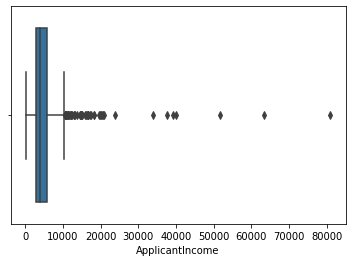

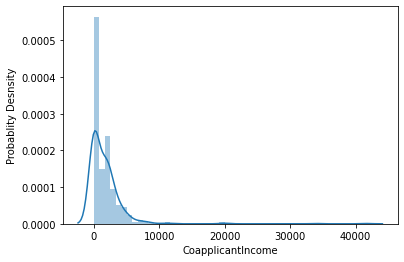

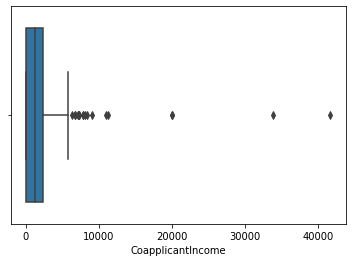

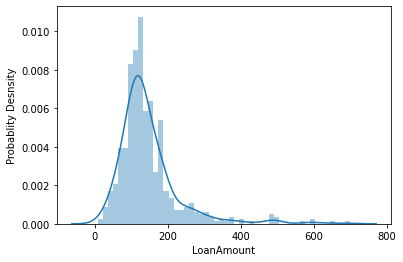

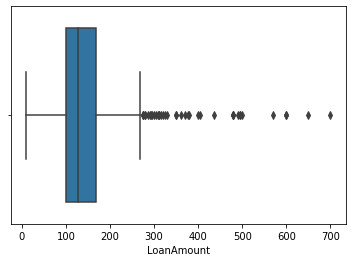

In [812]:
# distribution of continuous features
for feature in continuous_features:
    ax = sns.distplot(df[feature], hist=True, bins=50)
    ax.set(ylabel='Probablity Desnsity')
    plt.show()
    sns.boxplot(df[feature])
    plt.show()
    print('\n')

* Distribution of Applicant Income is right skewed and we can see the presence of outliers towards the right.
* Same goes for Co-applicant Income and Loan Amount.

### Bivariate Analysis

#### Target variable vs Categorical Features

In [813]:
df.groupby(feature).Loan_Status.value_counts().unstack()

Loan_Status,N,Y
LoanAmount,,
9.0,1.0,NaN
17.0,NaN,1.0
25.0,NaN,2.0
26.0,NaN,1.0
30.0,NaN,2.0
...,...,...
500.0,1.0,NaN
570.0,1.0,NaN
600.0,NaN,2.0


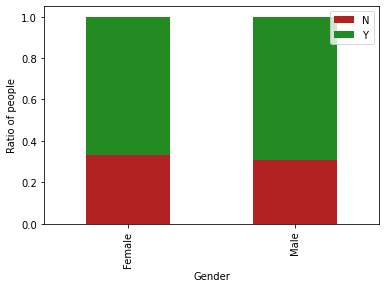

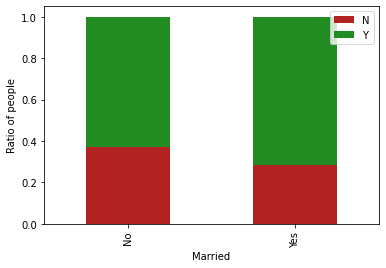

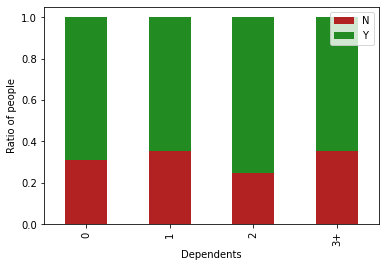

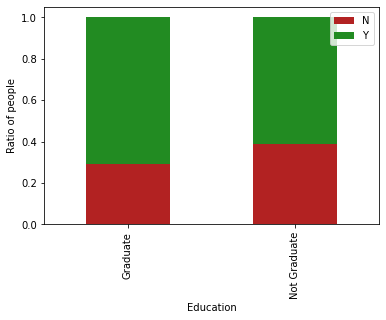

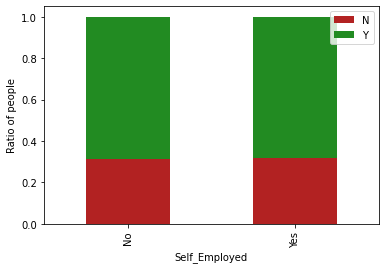

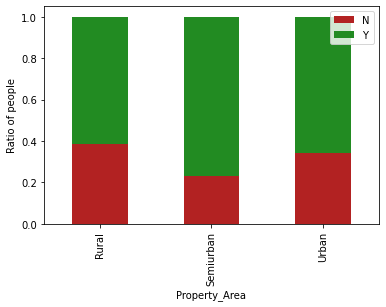

In [814]:
for feature in categorical_features:
    ax = df.groupby(feature).Loan_Status.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, 
                                                                                     color=['firebrick', 'forestgreen'])
    ax.set(ylabel='Ratio of people')
    plt.legend(loc='upper right')

* We can see that proportion of male and female applicants is  more or less same for both approved as well as unapproved loans.
* Proportion of married people is higher for approved loans i.e. married people are more likely to get a loan.
* Graduates are more likely to get a loan when compared to non-graduates.
* Higher ratio of applicants from semiurban areas have their loan approved.

#### Target varibale vs Discrete Features

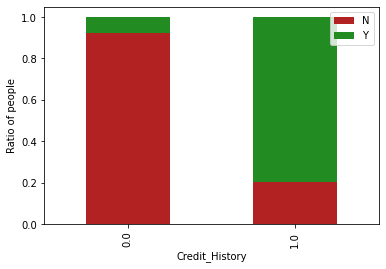

In [815]:
    ax = df.groupby('Credit_History').Loan_Status.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, 
                                                                                     color=['firebrick', 'forestgreen'])
    ax.set(ylabel='Ratio of people')
    plt.legend(loc='upper right')
    plt.show()

* Higher ratio of applicants with credit history have approved status i.e. people with credit history are more likely to get a loan.

#### Target variable vs Continuous Features

In [816]:
continuous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

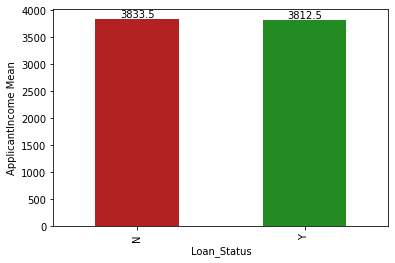

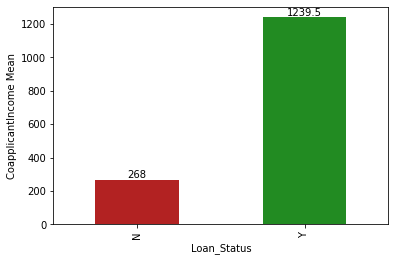

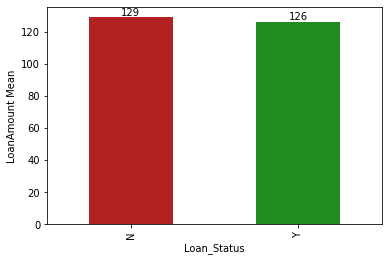

In [817]:
for feature in continuous_features:
    ax = df.groupby('Loan_Status')[feature].median().plot(kind='bar', color=['firebrick', 'forestgreen'])
    ax.bar_label(ax.containers[0])
    ax.set(ylabel=feature+' Mean')
    plt.show()

* Ideally applicants with approved status should have higher median income. However we can see that Income doesn't play much role here.
* Appplicants with approved status has higher median of coapplicant's income.
* Applicants with approved status have lower median of Loan Amount.

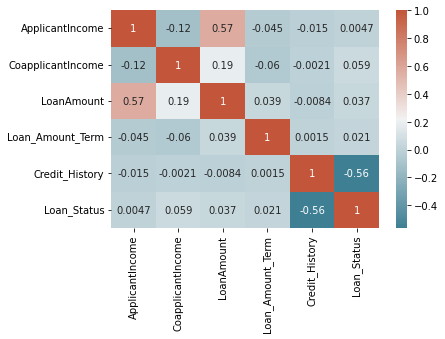

In [818]:
df1 = df.copy()
df1.Loan_Status = np.where(df1.Loan_Status=='Y', 0, 1)
corr = df1.corr()
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
               cmap=sns.diverging_palette(220, 20, as_cmap=True))

* We can see high correlation between Loan Status and Credit History.
* There is also high correlation between Loan Amount and Applicant Income.
* We can also see no correlation between Applicant Income and Loan Status which we saw earlier.

## Data Preprocessing

In [819]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.3, random_state=0)

### Handling Null values

In [820]:
# checking for missing values
null_features = [feature for feature in X.columns if X[feature].isna().any()]
null_features

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [821]:
for feature in null_features:
    print("Ratio of null values in '{}' is: {}".format(feature, X[feature].isna().sum()/len(df)))

Ratio of null values in 'Gender' is: 0.017915309446254073
Ratio of null values in 'Married' is: 0.004885993485342019
Ratio of null values in 'Dependents' is: 0.019543973941368076
Ratio of null values in 'Self_Employed' is: 0.04234527687296417
Ratio of null values in 'LoanAmount' is: 0.02768729641693811
Ratio of null values in 'Loan_Amount_Term' is: 0.017915309446254073
Ratio of null values in 'Credit_History' is: 0.06026058631921824


#### Categorical features

Distribution before handling null values


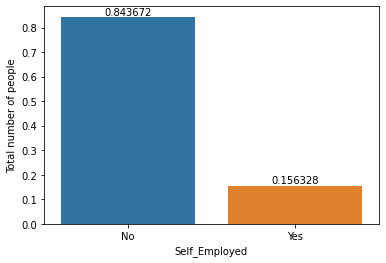

Distribution after handling null values


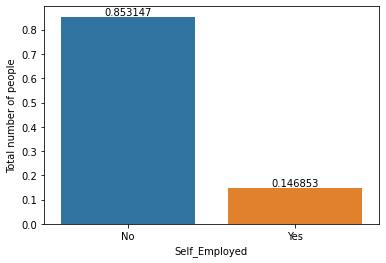



Distribution before handling null values


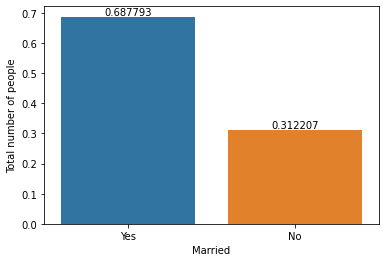

Distribution after handling null values


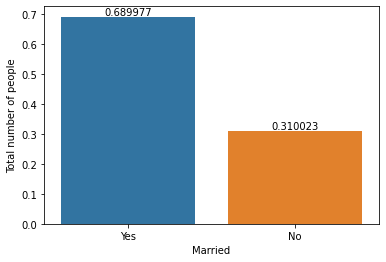



Distribution before handling null values


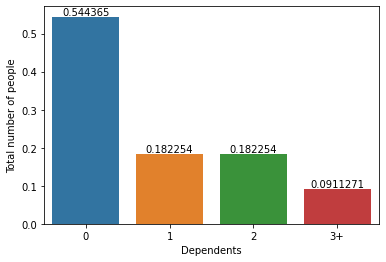

Distribution after handling null values


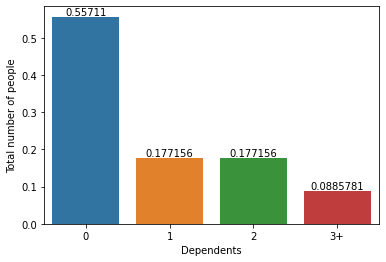



Distribution before handling null values


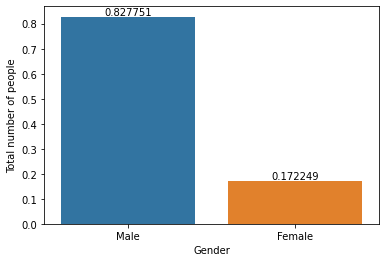

Distribution after handling null values


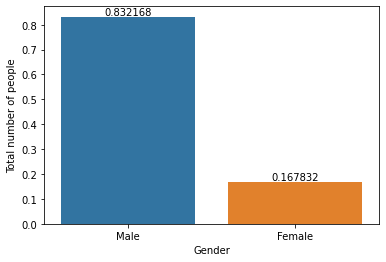

In [822]:
# handling null values in categorical features
for feature in set(null_features).intersection(set(categorical_features)):
    
    print('Distribution before handling null values')
    ax = sns.barplot(x=X[feature].value_counts().index, y=X[feature].value_counts(normalize=True))
    ax.bar_label(ax.containers[0])
    ax.set(xlabel=feature, ylabel='Total number of people')
    plt.show()
    
    X[feature].fillna(X[feature].mode()[0], inplace=True)
    X_test[feature].fillna(X_test[feature].mode()[0], inplace=True)
    df_test[feature].fillna(df_test[feature].mode()[0], inplace=True)
    
    print('Distribution after handling null values')
    ax = sns.barplot(x=X[feature].value_counts().index, y=X[feature].value_counts(normalize=True))
    ax.bar_label(ax.containers[0])
    ax.set(xlabel=feature, ylabel='Total number of people')
    plt.show()
    print('\n')

#### Discrete features

In [823]:
# discrete features with Null values 
for feature in set(discrete_features).intersection(set(null_features)):
    print(feature)

Credit_History
Loan_Amount_Term


Distribution before handling null values


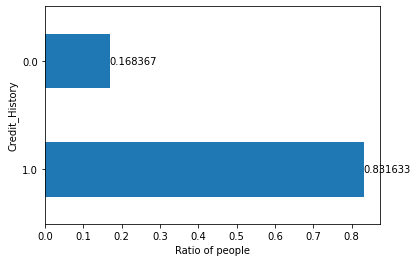

Distribution after handling null values


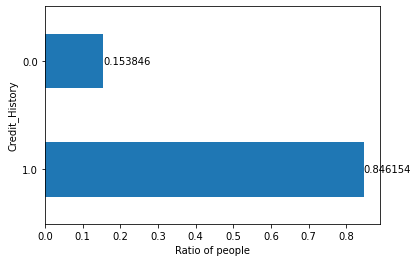



Distribution before handling null values


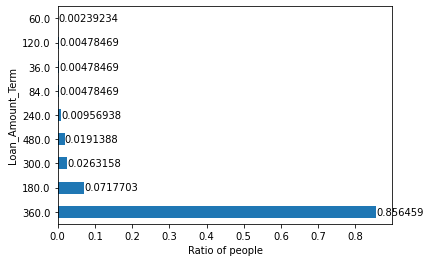

Distribution after handling null values


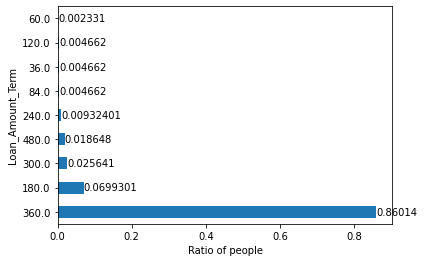

In [824]:
for feature in set(discrete_features).intersection(set(null_features)):
    
    print('Distribution before handling null values')
    ax = X[feature].value_counts(normalize=True).plot.barh()
    ax.bar_label(ax.containers[0])
    ax.set(ylabel=feature, xlabel='Ratio of people')
    plt.show()
    
    X[feature].fillna(X[feature].mode()[0], inplace=True)
    X_test[feature].fillna(X_test[feature].mode()[0], inplace=True)
    df_test[feature].fillna(df_test[feature].mode()[0], inplace=True)
    
    print('Distribution after handling null values')
    ax = X[feature].value_counts(normalize=True).plot.barh()
    ax.bar_label(ax.containers[0])
    ax.set(ylabel=feature, xlabel='Ratio of people')
    plt.show()
    print('\n')

#### Continuous features

In [825]:
for feature in set(null_features).intersection(set(continuous_features)):
    print(feature)

LoanAmount


Distribution before handling null values


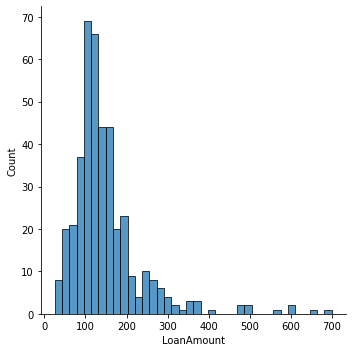

Distribution after handling null values


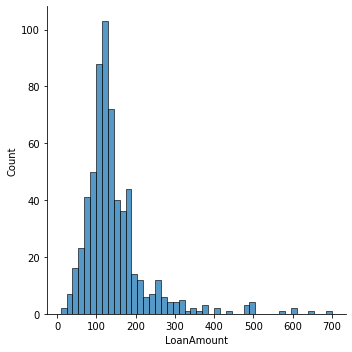

In [826]:
for feature in set(null_features).intersection(set(continuous_features)):
    
    print('Distribution before handling null values')
    sns.displot(X[feature])
    plt.show()
    
    print('Distribution after handling null values')
    sns.displot(df[feature].fillna(X[feature].median()))

In [827]:
for feature in set(null_features).intersection(set(continuous_features)):
    X[feature].fillna(df[feature].median(), inplace=True)
    X_test[feature].fillna(X_test[feature].median(), inplace=True)
    df_test[feature].fillna(df_test[feature].median(), inplace=True)

### Handling outliers

In [828]:
X.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,429.000000,429.000000,429.000000,429.000000,429.000000
mean,5599.685315,1598.929883,147.738928,342.377622,0.846154
std,6803.239508,2922.731119,87.625034,61.497641,0.361222
min,150.000000,0.000000,25.000000,36.000000,0.000000
10%,2238.600000,0.000000,72.800000,300.000000,0.000000
25%,2927.000000,0.000000,102.000000,360.000000,1.000000
50%,3850.000000,1040.000000,128.000000,360.000000,1.000000
75%,5780.000000,2223.000000,162.000000,360.000000,1.000000
90%,9518.400000,3566.000000,243.200000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


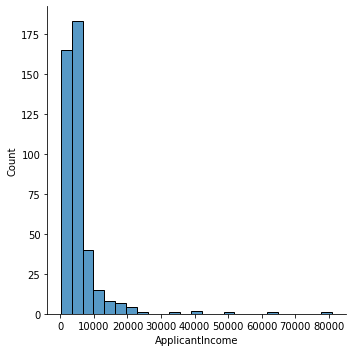

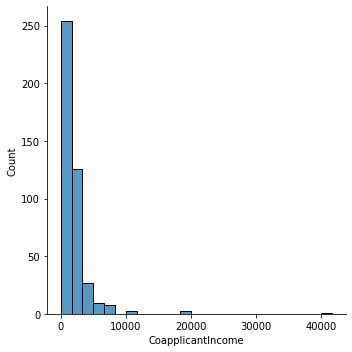

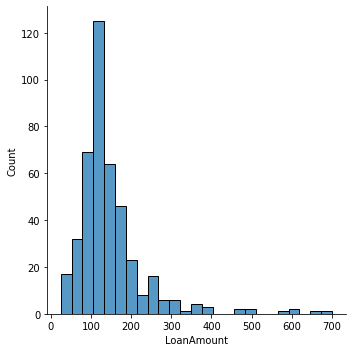

In [829]:
# checking distribution of continuous features
for feature in continuous_features:
    sns.displot(X[feature], bins=25)
    plt.show()

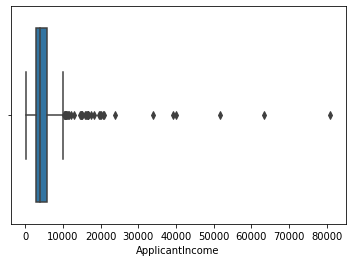

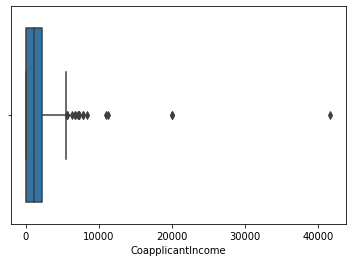

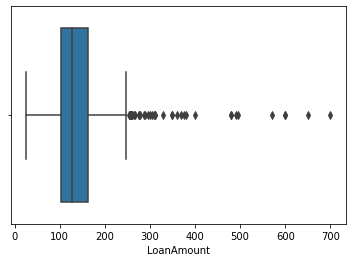

In [830]:
# checking for outliers
for feature in continuous_features:
    sns.boxplot(X[feature])
    plt.show()

In [831]:
# handling the outliers
X.ApplicantIncome[X.ApplicantIncome > 10000]= 10000
X.CoapplicantIncome[X.CoapplicantIncome > 5000] = 5000
X.LoanAmount[X.LoanAmount > 250] = 250

X_test.ApplicantIncome[X_test.ApplicantIncome > 10000]= 10000
X_test.CoapplicantIncome[X_test.CoapplicantIncome > 5000] = 5000
X_test.LoanAmount[X_test.LoanAmount > 250] = 250

df_test.ApplicantIncome[df_test.ApplicantIncome > 10000]= 10000
df_test.CoapplicantIncome[df_test.CoapplicantIncome > 5000] = 5000
df_test.LoanAmount[df_test.LoanAmount > 250] = 250

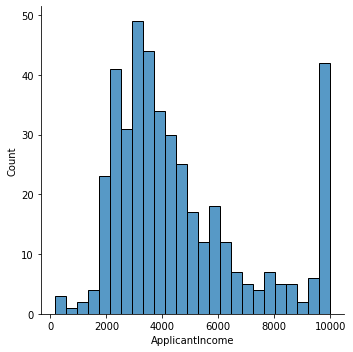

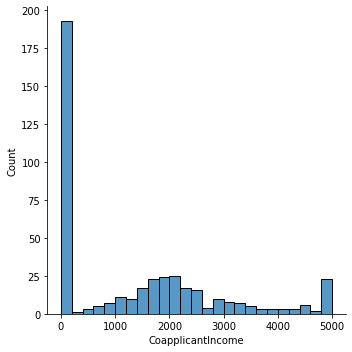

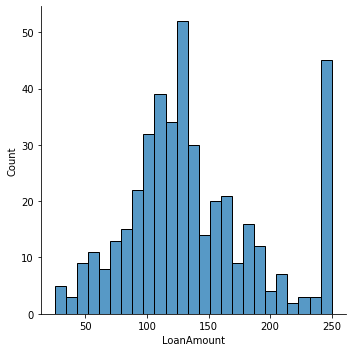

In [832]:
# rechecking distribution of continuous features
for feature in continuous_features:
    sns.displot(X[feature], bins=25)
    plt.show()

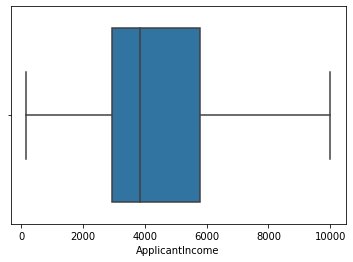

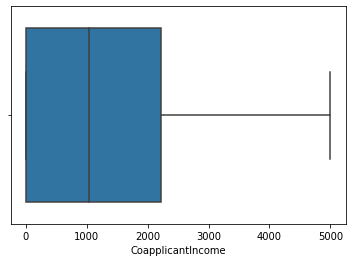

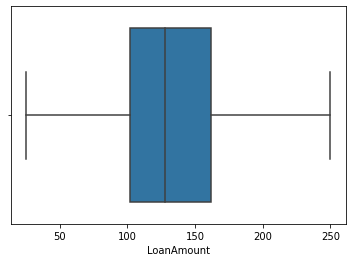

In [833]:
# checking for outliers
for feature in continuous_features:
    sns.boxplot(X[feature])
    plt.show()

### Encoding categorical features

In [834]:
X[categorical_features].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
351,Male,No,0,Graduate,No,Rural
593,Male,Yes,0,Graduate,No,Rural
320,Male,Yes,0,Graduate,No,Semiurban
186,Male,Yes,1,Graduate,Yes,Rural
557,Male,Yes,3+,Graduate,Yes,Semiurban


In [835]:
df_processed = df.copy()
for feature in categorical_features:
    mapper = {i:k for k, i in enumerate(df[df.Loan_Status=='Y'].groupby('Loan_Status')[feature].value_counts(normalize=True).
                            droplevel(0).index.to_list())}
    X[feature] = X[feature].map(mapper)
    X_test[feature] = X_test[feature].map(mapper)
    df_test[feature] = df_test[feature].map(mapper)

In [836]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,0,1,0,0,0,8750,4167.0,250.0,360.0,1.0,2
593,0,0,0,0,0,3859,3300.0,142.0,180.0,1.0,2
320,0,0,0,0,0,2400,2167.0,115.0,360.0,1.0,0
186,0,0,2,0,1,2178,0.0,66.0,300.0,0.0,2
557,0,0,3,0,1,10000,0.0,250.0,360.0,1.0,0


In [837]:
y = y.map({'Y': 1, 'N': 0})
y_test = y_test.map({'Y': 1, 'N': 0})

In [838]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 351 to 559
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             429 non-null    int64  
 1   Married            429 non-null    int64  
 2   Dependents         429 non-null    int64  
 3   Education          429 non-null    int64  
 4   Self_Employed      429 non-null    int64  
 5   ApplicantIncome    429 non-null    int64  
 6   CoapplicantIncome  429 non-null    float64
 7   LoanAmount         429 non-null    float64
 8   Loan_Amount_Term   429 non-null    float64
 9   Credit_History     429 non-null    float64
 10  Property_Area      429 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 40.2 KB


## Feature Selection

In [684]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,0,1,0,0,0,8750,4167.0,250.0,360.0,1.0,2
593,0,0,0,0,0,3859,3300.0,142.0,180.0,1.0,2
320,0,0,0,0,0,2400,2167.0,115.0,360.0,1.0,0
186,0,0,2,0,1,2178,0.0,66.0,300.0,0.0,2
557,0,0,3,0,1,10000,0.0,250.0,360.0,1.0,0


In [685]:
y.head()

351    0
593    1
320    1
186    0
557    1
Name: Loan_Status, dtype: int64

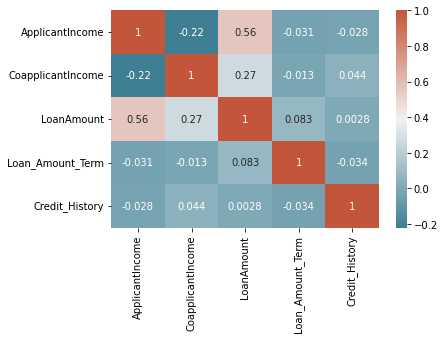

In [686]:
# checking for correlation
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
corr = X[numerical_features].corr()
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
               cmap=sns.diverging_palette(220, 20, as_cmap=True))

* No two variables have such a high level of correlation between them so as to warrant their removal.

In [687]:
# feature selection (playing around)
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif

noncon_features = [feature for feature in X.columns if X[feature].nunique() < 20]

chi = chi2(X[noncon_features],y)
print('Using Chi2:')
print(pd.DataFrame(chi, columns=X[noncon_features].columns, index=['F-value', 'p-value']), '\n')

kbest_chi2 = SelectKBest(chi2, k='all').fit(X[noncon_features],y)
print('Using SelectKBest and Chi2:')
print(pd.DataFrame(kbest_chi2.scores_, columns=['Score'], index=X[noncon_features].columns).sort_values(by='Score', ascending=False), '\n')

classif = f_classif(X[continuous_features], y)
print('Using f_classif:')
print(pd.DataFrame(classif, columns=X[continuous_features].columns, index=['F-value', 'p-value']), '\n')

kbest_fclassif = SelectKBest(f_classif, k='all').fit(X[continuous_features],y)
print('Using SelectKBest and f_classif:')
print(pd.DataFrame(kbest_fclassif.scores_, columns=['Score'], index=X[continuous_features].columns).sort_values(by='Score', ascending=False),'\n')

Using Chi2:
           Gender   Married  Dependents  Education  Self_Employed  \
F-value  0.007092  2.340001     0.00218   3.466112       0.006206   
p-value  0.932885  0.126090     0.96276   0.062638       0.937211   

         Loan_Amount_Term  Credit_History  Property_Area  
F-value          1.449705       19.290854       6.549943  
p-value          0.228575        0.000011       0.010489   

Using SelectKBest and Chi2:
                      Score
Credit_History    19.290854
Property_Area      6.549943
Education          3.466112
Married            2.340001
Loan_Amount_Term   1.449705
Gender             0.007092
Self_Employed      0.006206
Dependents         0.002180 

Using f_classif:
         ApplicantIncome  CoapplicantIncome  LoanAmount
F-value         0.042869           0.003521    0.987744
p-value         0.836072           0.952711    0.320857 

Using SelectKBest and f_classif:
                      Score
LoanAmount         0.987744
ApplicantIncome    0.042869
CoapplicantInco

## Modelling

### Logistic Regression

In [910]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=20)
lr.fit(X, y)

LogisticRegression(random_state=20)

In [868]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y, lr.predict(X)))
print(confusion_matrix(y, lr.predict(X)))

0.8018648018648019
[[ 62  79]
 [  6 282]]


In [869]:
print(accuracy_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))

0.827027027027027
[[ 22  29]
 [  3 131]]


In [889]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
space = {'solver': hp.choice('solver',['newton-cg', 'lbfgs', 'liblinear']),
         'C': hp.choice('C', [100, 10, 1.0, 0.1, 0.01])}

In [890]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model = LogisticRegression(solver=space['solver'],
                               C=space['C'])
    accuracy = cross_val_score(model, X, y, cv=5).mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

In [891]:
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
best

100%|█████| 100/100 [01:51<00:00,  1.12s/trial, best loss: -0.8019151846785226]


{'C': 2, 'solver': 0}

In [892]:
solvers = {i:k for i, k in enumerate(['newton-cg', 'lbfgs', 'liblinear'])}
c_values = {i:k for i, k in enumerate([100, 10, 1.0, 0.1, 0.01])}

In [901]:
trained_logistic = LogisticRegression(solver=solvers[best['solver']],
                                       C=2).fit(X,y)

In [902]:
print(accuracy_score(y, trained_logistic.predict(X)))
print(confusion_matrix(y, trained_logistic.predict(X)))

0.8018648018648019
[[ 62  79]
 [  6 282]]


In [903]:
print(accuracy_score(y_test, trained_logistic.predict(X_test)))
print(confusion_matrix(y_test, trained_logistic.predict(X_test)))

0.8216216216216217
[[ 21  30]
 [  3 131]]


In [904]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(estimator=trained_logistic, X=X, y=y, cv=skf)
scores

array([0.8372093 , 0.81395349, 0.79069767, 0.74418605, 0.82352941])

In [905]:
print(np.mean(scores))

0.8019151846785226


### Random Forest

In [799]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X, y)

RandomForestClassifier(random_state=10)

In [800]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y, rfc.predict(X)))
print(confusion_matrix(y, rfc.predict(X)))

1.0
[[141   0]
 [  0 288]]


In [801]:
print(accuracy_score(y_test, rfc.predict(X_test)))
print(confusion_matrix(y_test, rfc.predict(X_test)))

0.7891891891891892
[[ 22  29]
 [ 10 124]]


In [711]:
# RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=20)]
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=20)]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 4, 8, 12]
criterion = ['gini', 'entropy', 'log_loss']
max_features =["sqrt", "log2", None]
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 'criterion': criterion, 'max_features': max_features }
rfc_randomcv = RandomizedSearchCV(estimator=rfc, param_distributions= random_grid, n_iter= 200, cv= 3, random_state=10, 
                                  n_jobs= -1)
rfc_randomcv.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 62, 114, 166, 218,
                                                      270, 322, 374, 426, 478,
                                                      531, 583, 635, 687, 739,
                                                      791, 843, 895, 947,
                                                      1000],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8, 12],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=10)

In [712]:
rfc_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 791,
 'criterion': 'log_loss'}

In [713]:
best_random_grid = rfc_randomcv.best_estimator_

In [714]:
print(accuracy_score(y, best_random_grid.predict(X)))
print(confusion_matrix(y, best_random_grid.predict(X)))

0.8321678321678322
[[ 74  67]
 [  5 283]]


In [715]:
print(accuracy_score(y_test, best_random_grid.predict(X_test)))
print(confusion_matrix(y_test, best_random_grid.predict(X_test)))

0.8216216216216217
[[ 21  30]
 [  3 131]]


In [716]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': [rfc_randomcv.best_params_['criterion']],
              'max_features': [rfc_randomcv.best_params_['max_features']],
              'n_estimators': [rfc_randomcv.best_params_['n_estimators']-20,
                               rfc_randomcv.best_params_['n_estimators']-10,
                               rfc_randomcv.best_params_['n_estimators'],
                               rfc_randomcv.best_params_['n_estimators']+10],
              'min_samples_split': [rfc_randomcv.best_params_['min_samples_split']-1,
                                    rfc_randomcv.best_params_['min_samples_split'],
                                    rfc_randomcv.best_params_['min_samples_split']+1,
                                    rfc_randomcv.best_params_['min_samples_split']+2],
              'max_depth': [rfc_randomcv.best_params_['max_depth']-10,
                            rfc_randomcv.best_params_['max_depth'],
                            rfc_randomcv.best_params_['max_depth']+10],
              'min_samples_leaf': [rfc_randomcv.best_params_['min_samples_leaf']-1,
                                   rfc_randomcv.best_params_['min_samples_leaf'],
                                   rfc_randomcv.best_params_['min_samples_leaf']+1]}
rfc_gridcv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=True)
rfc_gridcv.fit(X, y)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ['log_loss'],
                         'max_depth': [781, 791, 801], 'max_features': ['log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [980, 990, 1000, 1010]},
             verbose=True)

In [717]:
rfc_gridcv.best_params_

{'criterion': 'log_loss',
 'max_depth': 781,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 980}

In [718]:
best_grid_search = rfc_gridcv.best_estimator_

In [719]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y, best_grid_search.predict(X)))
print(confusion_matrix(y, best_grid_search.predict(X)))

0.8181818181818182
[[ 68  73]
 [  5 283]]


In [720]:
print(accuracy_score(y_test, best_grid_search.predict(X_test)))
print(confusion_matrix(y_test, best_grid_search.predict(X_test)))

0.8216216216216217
[[ 21  30]
 [  3 131]]


In [749]:
# Bayesian Optimization
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space = {'criterion': hp.choice('criterion', ['entropy', 'gini', 'log_loss']),
         'n_estimators': hp.choice('n_estimators', [100, 250, 500, 750, 1000, 1250, 1500]),
         'max_depth': hp.choice('max_depth', np.linspace(start=10, stop=1000, num=10, dtype=int).tolist()),
         'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
         'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 1),
         'min_samples_split': hp.uniform('min_samples_split', 0, 1)}

In [741]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model = RandomForestClassifier(criterion=space['criterion'], max_depth=space['max_depth'],
                                   n_estimators=space['n_estimators'], max_features=space['max_features'],
                                   min_samples_leaf=space['min_samples_leaf'],
                                   min_samples_split=space['min_samples_split'])
    accuracy = cross_val_score(model, X, y, cv=5).mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

In [750]:
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
best

100%|█████| 100/100 [36:52<00:00, 22.12s/trial, best loss: -0.8018878248974008]


{'criterion': 0,
 'max_depth': 8,
 'max_features': 0,
 'min_samples_leaf': 0.03293809776377505,
 'min_samples_split': 0.02875330104146831,
 'n_estimators': 2}

In [753]:
crit = {i:k for i, k in enumerate(['entropy', 'gini', 'log_loss'])}
estimators = {i:k for i, k in enumerate([100, 250, 500, 750, 1000, 1250, 1500])}
depth = {i:k for i, k in enumerate(np.linspace(start=10, stop=1000, num=10, dtype=int).tolist())}
features = {i:k for i, k in  enumerate(['auto', 'sqrt', 'log2', None])}

In [759]:
trained_forest = RandomForestClassifier(criterion=crit[best['criterion']],
                                        n_estimators=estimators[best['n_estimators']],
                                        max_depth=depth[best['n_estimators']],
                                        max_features=features[best['max_features']],
                                        min_samples_leaf=best['min_samples_leaf'], 
                                        min_samples_split=best['min_samples_split'])
trained_forest.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=230, max_features='auto',
                       min_samples_leaf=0.03293809776377505,
                       min_samples_split=0.02875330104146831, n_estimators=500)

In [760]:
print(accuracy_score(y, trained_forest.predict(X)))
print(confusion_matrix(y, trained_forest.predict(X)))

0.8018648018648019
[[ 61  80]
 [  5 283]]


In [761]:
print(accuracy_score(y_test, trained_forest.predict(X_test)))
print(confusion_matrix(y_test, trained_forest.predict(X_test)))

0.827027027027027
[[ 21  30]
 [  2 132]]


In [907]:
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(estimator=trained_forest, X=X, y=y, cv=skf)
scores

array([0.8372093 , 0.81395349, 0.80232558, 0.74418605, 0.81176471])

In [908]:
np.mean(scores)

0.8018878248974008

In [844]:
res = trained_forest.predict(df_test)
pd.DataFrame(np.where(res==0, 'N', 'Y')).to_csv('RF.csv')

### Gradient Boost

In [694]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=15)
gbc.fit(X, y)

GradientBoostingClassifier(random_state=15)

In [695]:
print(accuracy_score(y, gbc.predict(X)))
print(confusion_matrix(y, gbc.predict(X)))

0.8974358974358975
[[ 97  44]
 [  0 288]]


In [696]:
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, gbc.predict(X_test)))

0.8054054054054054
[[ 21  30]
 [  6 128]]


In [855]:
# RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
learning_rate = [0.05, 0.1, 0.2, 0.3, 0.4]
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=20)]
max_depth = [int(x) for x in np.linspace(start=1, stop=10, num=2)]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 4, 8, 12]
criterion = ['friedman_mse', 'squared_error', 'mse']
max_features =["sqrt", "log2"]
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 'criterion': criterion, 'max_features': max_features,
              'learning_rate': learning_rate}
gbc_randomcv = RandomizedSearchCV(estimator=gbc, param_distributions= random_grid, n_iter= 200, cv= 3, random_state=10, 
                                  n_jobs= -1, verbose=True)
gbc_randomcv.fit(X, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=15),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [1, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8, 12],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=10, verbose=True)

In [856]:
gbc_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 1,
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [723]:
random_gbc = gbc_randomcv.best_estimator_

In [724]:
print(accuracy_score(y, random_gbc.predict(X)))
print(confusion_matrix(y, random_gbc.predict(X)))

0.8041958041958042
[[ 64  77]
 [  7 281]]


In [725]:
print(accuracy_score(y_test, random_gbc.predict(X_test)))
print(confusion_matrix(y_test, random_gbc.predict(X_test)))

0.8216216216216217
[[ 21  30]
 [  3 131]]


### XGBoost

In [572]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [573]:
print(accuracy_score(y, xgbc.predict(X)))
print(confusion_matrix(y, xgbc.predict(X)))

1.0
[[141   0]
 [  0 288]]


In [574]:
print(accuracy_score(y_test, xgbc.predict(X_test)))
print(confusion_matrix(y_test, xgbc.predict(X_test)))

0.8108108108108109
[[ 29  22]
 [ 13 121]]


In [857]:
# RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3]
booster = ['gbtree', 'gblinear', 'dart']
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=20)]
max_depth = [int(x) for x in np.linspace(start=2, stop=16, num=4)]
gamma = [0.1, 0.2, 0.3, 0.6, 1, 3, 8, 20, 50, 200]
min_child_weight = [int(x) for x in np.linspace(start=1, stop=10, num=3)]
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'booster': booster,
               'learning_rate': learning_rate, 'gamma': gamma, 'min_child_weight': min_child_weight,
               }
xgbc_randomcv = RandomizedSearchCV(estimator=xgbc, param_distributions= random_grid, n_iter= 200, cv= 3, random_state=10, 
                                  n_jobs= -1, verbose=True)
xgbc_randomcv.fit(X, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                   n_iter=200, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'gamma': [0.1, 0.2, 0.3, 0.6, 1, 3, 8,
                                                  20, 50, 200],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [2, 6, 11, 16],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=10, verbose=True)

In [858]:
xgbc_randomcv.best_params_

{'n_estimators': 700,
 'min_child_weight': 5,
 'max_depth': 2,
 'learning_rate': 0.01,
 'gamma': 0.6,
 'booster': 'gbtree'}

In [859]:
xgbc_random = xgbc_randomcv.best_estimator_

In [862]:
print(accuracy_score(y, xgbc_random.predict(X)))
print(confusion_matrix(y, xgbc_random.predict(X)))

0.8088578088578089
[[ 64  77]
 [  5 283]]


In [863]:
print(accuracy_score(y_test, xgbc_random.predict(X_test)))
print(confusion_matrix(y_test, xgbc_random.predict(X_test)))

0.827027027027027
[[ 22  29]
 [  3 131]]


In [909]:
scores = cross_val_score(estimator=xgbc_random, X=X, y=y, cv=skf)
print(scores)
print('Mean:{}'.format(np.mean(scores)))

[0.8372093  0.8255814  0.79069767 0.74418605 0.82352941]
Mean:0.8042407660738714


## Test Dataset

In [762]:
df_test = pd.read_csv('Loan Eligibility_Test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test[feature].fillna(X_test[feature].mode()[0], inplace=True)